In [2]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
from folium.features import Choropleth
import cenpy as c
import networkx as nx
import osmnx as ox
from IPython.display import IFrame
import ast

/Users/ethandeng/anaconda3/envs/dsc180a/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Finding insights on AFDC dataset, mostly focusing on EV Chargers

In [3]:
df = pd.read_csv('data/fuel_stations.csv')
df

/var/folders/6g/hzhm6cpn3n53kypvmqckpqrh0000gn/T/ipykernel_84225/2422982858.py:1: DtypeWarning: Columns (14,28,29,31,32,33,34,37,46,50,51,52,53,54,55,56,59,60,61,62,63,66,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/fuel_stations.csv')


,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,maximum_vehicle_class,...,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency.id,federal_agency.code,federal_agency.name,ev_network_ids.station,ev_network_ids.posts
0,private,NaN,NaN,NaN,2024-10-11,NaN,CNG,Private,17,MD,...,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN
1,private,NaN,GOVERNMENT,NaN,2024-02-12,NaN,CNG,Private - Government only,45,LD,...,NaN,NaN,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN
2,private,NaN,NaN,NaN,2023-12-13,NaN,CNG,Private,64,HD,...,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN
3,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,2024-04-14,NaN,CNG,Public - Credit card at all times,73,MD,...,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN
4,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,2024-11-06,NaN,CNG,Public - Credit card at all times,81,MD,...,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90794,public,24 hours daily,NaN,NaN,2024-11-21,NaN,ELEC,Public,371770,NaN,...,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,['b08ade98-43f1-4506-b820-20ac9377be8a'],"['6709a497dc9ef04fcb51a121', '6709a497dc9ef04f..."
90795,public,24 hours daily,NaN,NaN,2024-11-21,NaN,ELEC,Public,371771,NaN,...,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,['cfbad0f3-3968-4cea-891e-51d9d00bdd72'],"['6334036d769d347763920a36', '6334036d769d3477..."
90796,public,24 hours daily,NaN,NaN,2024-11-21,NaN,ELEC,Public,371772,NaN,...,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,['ccb3851a-a716-4254-9fca-9b622cd1737c'],"['63629495ed69bf480aac7e61', '63629495ed69bf48..."
90797,public,24 hours daily,NaN,NaN,2024-11-21,NaN,ELEC,Public,371773,NaN,...,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,['ac526980-fbed-4cd4-a491-23a984c6b2b0'],"['64a8b721adb945566afb0721', '64b61e2db323a268..."


There are so many columns in this dataset, lets just look at the ones that could bring more insights on EV Chargers

In [4]:
df.columns

Index(['access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',
       'hy_i

Below we can see that there are way too many facility types to consider, and many of them are 'nan.' So this isn't very useful to us

In [5]:
# Count all unique facility in the 'facility_type' column
facility_counts = df['facility_type'].value_counts(dropna=False).to_dict()
facility_counts

{nan: 59853,
 'CONVENIENCE_STORE': 4942,
 'HOTEL': 3170,
 'CAR_DEALER': 2949,
 'GAS_STATION': 2338,
 'PARKING_LOT': 1456,
 'PUBLIC': 1154,
 'FUEL_RESELLER': 1101,
 'FED_GOV': 1067,
 'RENTAL_CAR_RETURN': 1042,
 'OFFICE_BLDG': 1028,
 'MUNI_GOV': 1020,
 'SHOPPING_CENTER': 782,
 'UTILITY': 648,
 'COLLEGE_CAMPUS': 533,
 'FLEET_GARAGE': 526,
 'PARKING_GARAGE': 510,
 'STANDALONE_STATION': 496,
 'RESTAURANT': 486,
 'GROCERY': 467,
 'PAY_GARAGE': 412,
 'INN': 358,
 'BREWERY_DISTILLERY_WINERY': 288,
 'TRAVEL_CENTER': 284,
 'OTHER': 279,
 'STATE_GOV': 270,
 'MULTI_UNIT_DWELLING': 267,
 'HOSPITAL': 246,
 'SCHOOL': 231,
 'PARK': 229,
 'COOP': 206,
 'AIRPORT': 191,
 'NATL_PARK': 182,
 'SHOPPING_MALL': 150,
 'LIBRARY': 147,
 'REC_SPORTS_FACILITY': 140,
 'OTHER_ENTERTAINMENT': 137,
 'MIL_BASE': 134,
 'BANK': 134,
 'MUSEUM': 95,
 'B_AND_B': 85,
 'FIRE_STATION': 79,
 'STREET_PARKING': 78,
 'TRUCK_STOP': 76,
 'AUTO_REPAIR': 59,
 'RESEARCH_FACILITY': 58,
 'CAMPGROUND': 58,
 'RETAIL': 50,
 'PLACE_OF_WORSHI

It's interesting to see how many are utilizing renewable sources, and theres clearly a very limitted amount, and most are not even documented

In [6]:
# Count all unique renewable source in the 'ev_renewable_source' column
ev_renewables_count = df['ev_renewable_source'].value_counts(dropna=False).to_dict()
ev_renewables_count

{nan: 90390,
 'SOLAR': 266,
 'NONE': 100,
 'WIND': 30,
 'HYDRO': 10,
 'WASTEWATER': 3}

Here we investigate the distribution of the different EV connector types, and there is some interesting data here that tells us that there are far more J1772 plugs than any other charger out there

In [7]:
# Flatten the lists by parsing the string representation of lists into actual lists
flattened_connectors = []

for connectors in df['ev_connector_types'].dropna():
    # Convert the string representation of lists to actual lists
    connector_list = ast.literal_eval(connectors)
    flattened_connectors.extend(connector_list)

# Count the occurrences of each connector type
connector_counts = Counter(flattened_connectors)

# Include None
nan_count = df['ev_connector_types'].isna().sum()
connector_counts['None'] = nan_count

# Sort the result by count
ev_connectors_count_sorted = dict(sorted(connector_counts.items(), key=lambda item: item[1], reverse=True))

# Display the sorted counts
ev_connectors_count_sorted

{'J1772': 65261,
 'None': 11566,
 'J1772COMBO': 9767,
 'TESLA': 7869,
 'CHADEMO': 6398,
 'NEMA515': 316,
 'NEMA520': 171,
 'NEMA1450': 159}

Here I plot the number of each connector on a bar graph to get a better visual representation of the differences in values

<function matplotlib.pyplot.show(close=None, block=None)>

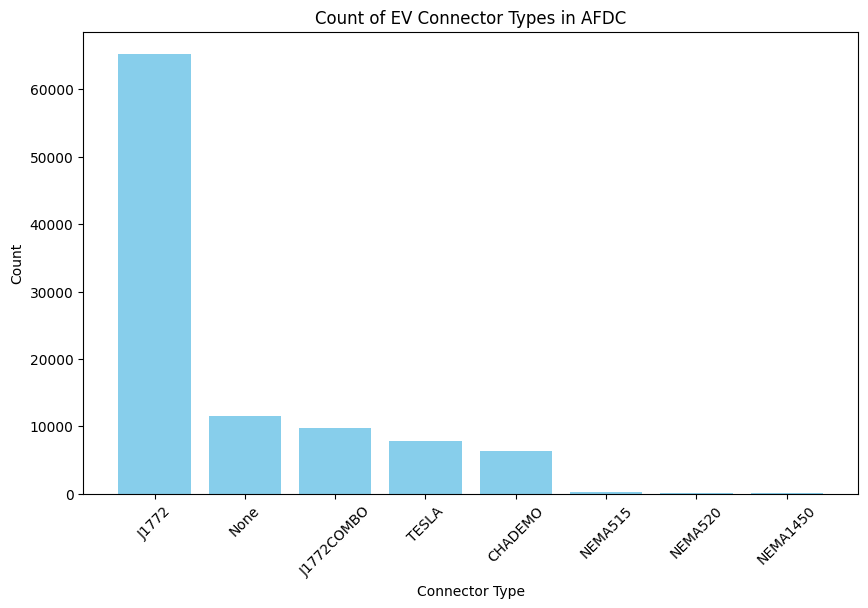

In [8]:
plt.figure(figsize=(10,6))
plt.bar(ev_connectors_count_sorted.keys(), ev_connectors_count_sorted.values(), color='skyblue')
plt.title('Count of EV Connector Types in AFDC')
plt.xlabel('Connector Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show

Here I get the count of each fuel type found in the dataset, and the overwhelming majority is electric

In [9]:
# Count all unique fuel types in the 'fuel_type_code' column
fuel_code_count = df['fuel_type_code'].value_counts(dropna=False).to_dict()
fuel_code_count

{'ELEC': 79276,
 'E85': 4703,
 'LPG': 2834,
 'BD': 1791,
 'CNG': 1322,
 'RD': 655,
 'LNG': 114,
 'HY': 104}

Here I plot the count of each fuel type to help visualize how drastic the differnece in values are

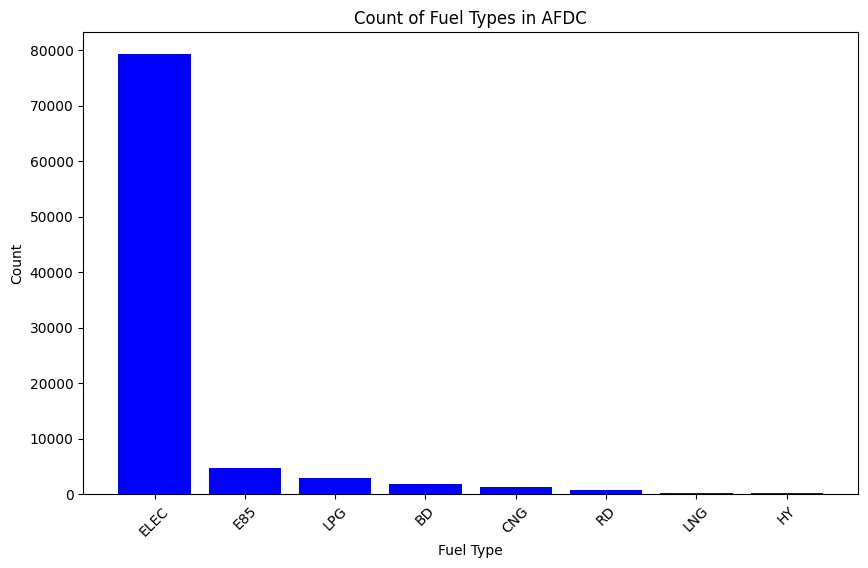

In [10]:
plt.figure(figsize=(10,6))
plt.bar(fuel_code_count.keys(), fuel_code_count.values(), color='blue')
plt.title('Count of Fuel Types in AFDC')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here I get the columns I found relevant to get more insight on the EV Chargers, as most of the other columns give us information about other fuel types or are just completely irrelevant.

In [11]:
# Extracting the relevant columns in the dataframe for analysis
relevant_columns = ['id', 'access_code', 'fuel_type_code', 'open_date', 'date_last_confirmed', 
                    'state', 'zip', 'city', 'latitude', 'longitude', 'ev_connector_types', 'ev_network'
                    ]
rdf = df[relevant_columns]

# Getting only Electric fuel types
rdf_ELEC = rdf[rdf['fuel_type_code'] == 'ELEC']
rdf_ELEC['open_date'] = pd.to_datetime(rdf_ELEC['open_date'], errors='coerce')
rdf_ELEC

/var/folders/6g/hzhm6cpn3n53kypvmqckpqrh0000gn/T/ipykernel_84225/3734144729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf_ELEC['open_date'] = pd.to_datetime(rdf_ELEC['open_date'], errors='coerce')


,id,access_code,fuel_type_code,open_date,date_last_confirmed,state,zip,city,latitude,longitude,ev_connector_types,ev_network
124,1517,private,ELEC,1999-10-15,2023-09-14,CA,91352,Sun Valley,34.248319,-118.387971,"['CHADEMO', 'J1772', 'J1772COMBO']",SHELL_RECHARGE
125,1523,public,ELEC,1995-08-30,2023-01-10,CA,90015,Los Angeles,34.040539,-118.271387,['J1772'],Non-Networked
126,1525,private,ELEC,1999-10-15,2023-09-14,CA,90012,Los Angeles,34.059133,-118.248589,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked
127,1531,private,ELEC,2018-05-01,2024-01-09,CA,90803,Long Beach,33.759802,-118.096665,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked
128,1552,private,ELEC,1999-10-15,2024-01-09,CA,90744,Wilmington,33.770508,-118.265628,['J1772'],Non-Networked
...,...,...,...,...,...,...,...,...,...,...,...,...
90794,371770,public,ELEC,2024-11-21,2024-11-21,NC,27405,GREENSBORO,36.086100,-79.781702,['J1772COMBO'],EV Connect
90795,371771,public,ELEC,2024-11-21,2024-11-21,CA,91606,North Hollywood,34.183859,-118.387419,['J1772'],EV Connect
90796,371772,public,ELEC,2024-11-21,2024-11-21,CA,90503,Torrance,33.836794,-118.356955,['J1772'],EV Connect
90797,371773,public,ELEC,2024-11-21,2024-11-21,GA,30830,WAYNESBORO,33.111382,-82.026612,"['J1772', 'J1772COMBO']",EV Connect


Here I use data from the internet that contains all the zip codes in SDGE and I use that to condence down the dataframe into just the rows that have a zip code in the SDGE territory

In [12]:
# Read in csv that contains all the zip codes in the SDGE Territory 
# and creates a list of unique zip codes in SDGE
SDGE_zip_codes_df = pd.read_csv('data/SDGE_zip_codes_2024.csv')
SDGE_zip_codes = SDGE_zip_codes_df['ZipCode'].unique()
SDGE_zip_codes = [str(zip_code) for zip_code in SDGE_zip_codes]

# Create Dataframe of all Electric Fuel sources in SDGE Zip codes
rdf_ELEC['zip'] = rdf_ELEC['zip'].astype(str)
SDGE_df = rdf_ELEC[rdf_ELEC['zip'].isin(SDGE_zip_codes)]
SDGE_df


/var/folders/6g/hzhm6cpn3n53kypvmqckpqrh0000gn/T/ipykernel_84225/89281783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf_ELEC['zip'] = rdf_ELEC['zip'].astype(str)


,id,access_code,fuel_type_code,open_date,date_last_confirmed,state,zip,city,latitude,longitude,ev_connector_types,ev_network
136,6355,public,ELEC,1997-07-30,2024-08-15,CA,92037,La Jolla,32.899470,-117.243000,['J1772'],Non-Networked
3091,39886,public,ELEC,2011-03-15,2024-02-12,CA,92020,El Cajon,32.795896,-116.976156,['J1772'],Non-Networked
3094,39889,public,ELEC,2011-03-15,2024-02-12,CA,92029,Escondido,33.116492,-117.106837,['J1772'],Non-Networked
3118,39915,public,ELEC,2011-03-15,2024-02-12,CA,91950,National City,32.659001,-117.100836,['J1772'],Non-Networked
3119,39916,public,ELEC,2011-03-15,2024-02-12,CA,92056,Oceanside,33.181953,-117.298334,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked
...,...,...,...,...,...,...,...,...,...,...,...,...
90527,371388,public,ELEC,2024-11-16,2024-11-21,CA,92154,San Diego,32.565890,-116.918901,['J1772'],ChargePoint Network
90650,371540,public,ELEC,2024-11-19,2024-11-21,CA,92024,Encinitas,33.061196,-117.262326,['J1772'],ChargePoint Network
90711,371656,public,ELEC,2024-11-20,2024-11-21,CA,92694,Ladera Ranch,33.557595,-117.627120,['J1772'],ChargePoint Network
90712,371657,public,ELEC,2024-11-20,2024-11-21,CA,92694,Ladera Ranch,33.558222,-117.627168,['J1772'],ChargePoint Network


# Time series graph shows massive increase in EV Charging Stations in 2020

Getting the total number of EV chargers added per year in the SDGE territory

In [13]:
# Group by the number entries there are for each year
SDGE_growth_df = SDGE_df.groupby(SDGE_df['open_date'].dt.to_period('Y')).size().reset_index(name='stations_confirmed')

# Create a new column calculating the total number of stations there are
SDGE_growth_df['cumulative_stations'] = SDGE_growth_df['stations_confirmed'].cumsum()
SDGE_growth_df = SDGE_growth_df[(SDGE_growth_df['open_date'].dt.year > 2000) & (SDGE_growth_df['open_date'].dt.year < 2025)]
SDGE_growth_df['open_date'] = SDGE_growth_df['open_date'].dt.to_timestamp()

Plot the Time Series graph to see the massive growth spike in EV chargers being built in 2020

In [14]:
# Create a plotly express line chart expressing the same data as above but now with interactivity
fig = px.line(
            SDGE_growth_df,
            x='open_date',
            y=['cumulative_stations', 'stations_confirmed'],
            labels={'value': 'Number of Charging Stations',
                    'variable': 'Legend'},
            title='Cumulative Growth of EV Charging Stations in SDGE Territory',
            width=900,
            height=600
            )

# Update the traces for better visibility
fig.update_traces(mode='lines+markers')

# Customize the legend
fig.for_each_trace(lambda t: t.update(name={'cumulative_stations': 'Cumulative Chargers',
                                            'stations_confirmed': 'Chargers Added That Year'}
                                            [t.name]))
fig.show()

Now get the Cumulative Growth of EV Chargering stations in the whole United States

In [15]:
# Group by the number entries there are for each year
growth_df = rdf_ELEC.groupby(rdf_ELEC['open_date'].dt.to_period('Y')).size().reset_index(name='stations_confirmed')

# Create a new column calculating the total number of stations there are
growth_df['cumulative_stations'] = growth_df['stations_confirmed'].cumsum()
growth_df = growth_df[(growth_df['open_date'].dt.year > 2000) & (growth_df['open_date'].dt.year < 2025)]
growth_df['open_date'] = growth_df['open_date'].dt.to_timestamp()

In [16]:
# Create a Plotly line chart for Cumulative Growth of EV Charging Stations Over Time in the US
fig = px.line(
    growth_df, 
    x='open_date', 
    y=['cumulative_stations', 'stations_confirmed'],
    labels={'value': 'Number of Charging Stations',
            'variable': 'Legend'},
    title='Cumulative Growth of EV Charging Stations Over Time in the US',
    width=900,  # Set desired width
    height=600   # Set desired height
)

# Update the traces for better visualization
fig.update_traces(mode='lines+markers')

# Customize the legend
fig.for_each_trace(lambda t: t.update(name={'cumulative_stations': 'Cumulative Chargers',
                                            'stations_confirmed': 'Chargers Added That Year'}
                                            [t.name]))
fig.show()

# Time Series Growth of EV Charging Seperated by Ports

In [17]:
# Explode the lists into individual rows
def safe_literal_eval(val):
    """Safely evaluate strings to Python lists, leaving lists as is."""
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val
    return val

# Apply `safe_literal_eval` only to strings
SDGE_df['ev_connector_types'] = SDGE_df['ev_connector_types'].dropna().apply(safe_literal_eval)
SDGE_df_exploded = SDGE_df.explode('ev_connector_types')
SDGE_df_exploded = SDGE_df_exploded.dropna(subset=['ev_connector_types'])

# Remove unwanted connector types (e.g., NEMA types)
SDGE_df_exploded = SDGE_df_exploded[~SDGE_df_exploded['ev_connector_types'].str.contains('NEMA')]

# Group by year and 'ev_connector_types' and count the number of stations confirmed
growth_df = SDGE_df_exploded.groupby([SDGE_df_exploded['open_date'].dt.to_period('Y'), 'ev_connector_types']).size().reset_index(name='stations_confirmed')

# Create cumulative sum for each connector type
growth_df['cumulative_stations'] = growth_df.groupby('ev_connector_types')['stations_confirmed'].cumsum()
growth_df = growth_df[(growth_df['open_date'].dt.year > 2008) & (growth_df['open_date'].dt.year < 2025)]

# Convert 'open_date' to a timestamp for plotting
growth_df['open_date'] = growth_df['open_date'].dt.to_timestamp()

# Create the interactive Plotly plot
fig = px.line(
    growth_df, 
    x='open_date', 
    y='cumulative_stations', 
    color='ev_connector_types',
    labels={'cumulative_stations': 'Number of Charging Stations',
            'open_date': 'Date',
            'ev_connector_types': 'Connector Type'},
    title='Growth of EV Charging Stations by Connector Type Over Time in SDGE Territory',
    width=900,
    height=600
)

fig.show()

/var/folders/6g/hzhm6cpn3n53kypvmqckpqrh0000gn/T/ipykernel_84225/2007543763.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:

# Apply `safe_literal_eval` only to strings
rdf_ELEC['ev_connector_types'] = rdf_ELEC['ev_connector_types'].dropna().apply(safe_literal_eval)
rdf_ELEC_exploded = rdf_ELEC.explode('ev_connector_types')
rdf_ELEC_exploded = rdf_ELEC_exploded.dropna(subset=['ev_connector_types'])

# Remove unwanted connector types (e.g., NEMA types)
rdf_ELEC_exploded = rdf_ELEC_exploded[~rdf_ELEC_exploded['ev_connector_types'].str.contains('NEMA')]

# Step 2: Group by year and 'ev_connector_types' and count the number of stations confirmed
growth_df = rdf_ELEC_exploded.groupby([rdf_ELEC_exploded['open_date'].dt.to_period('Y'), 'ev_connector_types']).size().reset_index(name='stations_confirmed')

# Step 3: Create cumulative sum for each connector type
growth_df['cumulative_stations'] = growth_df.groupby('ev_connector_types')['stations_confirmed'].cumsum()
growth_df = growth_df[growth_df['open_date'].dt.year > 2008]

# Convert 'open_date' to a timestamp for plotting
growth_df['open_date'] = growth_df['open_date'].dt.to_timestamp()

# Step 4: Create the interactive Plotly plot
fig = px.line(
    growth_df, 
    x='open_date', 
    y='cumulative_stations', 
    color='ev_connector_types',
    labels={'cumulative_stations': 'Number of Charging Stations',
            'open_date': 'Date',
            'ev_connector_types': 'Connector Type'},
    title='Growth of EV Charging Stations by Connector Type Over Time in the United States',
    width=900,
    height=600
)
fig.show()

/var/folders/6g/hzhm6cpn3n53kypvmqckpqrh0000gn/T/ipykernel_84225/1969747140.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Creating Choropleth Geospatial Map of Charger Density in Zip Codes of SDGE

In [19]:
# Group by 'zip' to get the count of chargers in each ZIP code
chargers_per_zip_SDGE = SDGE_df.groupby('zip').size().reset_index(name='charger_count')
# Load the shapefile containing ZIP code boundaries for all of US
zip_shapefile = gpd.read_file('data/tl_2024_us_zcta520/tl_2024_us_zcta520.shp')
# Ensure that the ZIP code column in both dataframes are of the same type (string)
chargers_per_zip_SDGE['zip'] = chargers_per_zip_SDGE['zip'].astype(str)
zip_shapefile['ZCTA5CE20'] = zip_shapefile['ZCTA5CE20'].astype(str)

# Merge the charger data with the ZIP code shapefile
map_zip_chargers = zip_shapefile.merge(chargers_per_zip_SDGE, left_on='ZCTA5CE20', right_on='zip', how='inner')

# Fill NaN values with 0 for ZIP codes that have no chargers
map_zip_chargers['charger_count'] = map_zip_chargers['charger_count'].fillna(0)
map_zip_chargers = map_zip_chargers.sort_values('charger_count', ascending=False)
map_zip_chargers

DriverError: Failed to open dataset (flags=68): data/tl_2024_us_zcta520/tl_2024_us_zcta520.shp

Plot the density of EV chargers by zip code on a geospatial map

In [ ]:
# Plot the merged GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
map_zip_chargers.plot(column='charger_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and axis labels
ax.set_title('EV Charger Density by ZIP Code', fontdict={'fontsize': 15})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

Here I did the same thing but used folium to make the map interactive and more detailed

In [ ]:
# Create a Folium map centered around the region
m = folium.Map(location=[32.8, -117.2], zoom_start=10)  # Center on San Diego area

# Add the GeoJson layer with a choropleth representation
folium.Choropleth(
    geo_data=map_zip_chargers.to_json(),
    data=map_zip_chargers,
    columns=['ZCTA5CE20', 'charger_count'],
    key_on='feature.properties.ZCTA5CE20',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='EV Charger Density'
).add_to(m)

# Add tooltips to display ZIP code and charger count when hovering over each area
folium.GeoJson(
    map_zip_chargers.to_json(),
    tooltip=folium.GeoJsonTooltip(fields=['ZCTA5CE20', 'charger_count'],
                                  aliases=['ZIP Code', 'Charger Count'])
).add_to(m)

# Save the map to an HTML file
m.save('figures/ev_charger_density_map.html')

# Display the interactive map
m

# Gathering Census Data with Cenpy and Merging with AFDC for more EDA

In [ ]:
# Use products.APIConnection to connect to the 
# American Community Survey (ACS) dataset 5-Year Estimates
connection = c.products.APIConnection('ACSDT5Y2022')
# Drop all rows where concept is NA
census_df = connection.variables[~connection.variables['concept'].isna()]

# Finding Relationship Between Median Household Income and EV Charger Density

In [ ]:
# MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)
income_variable = 'B19013_001E'

# Query the data for all zip codes in the ACS 5-Year Estimates dataset
income_data = connection.query(
    cols=[income_variable],
    geo_unit='zip code tabulation area'
)

In [ ]:
# Rename columns and filter for SDGE ZIP codes
income_data = income_data.rename(columns={'zip code tabulation area': 'zip', income_variable: 'median_income'})
SDGE_income_data = income_data[income_data['zip'].isin(chargers_per_zip_SDGE['zip'])]
SDGE_income_data

In [ ]:
# Merge charger count with median income data
chargers_and_income_SDGE = chargers_per_zip_SDGE.merge(SDGE_income_data, on='zip', how='left')

# Merge the combined data with the ZIP code shapefile
map_chargers_income = zip_shapefile.merge(chargers_and_income_SDGE, left_on='ZCTA5CE20', right_on='zip', how='inner')
map_chargers_income['charger_count'] = pd.to_numeric(map_chargers_income['charger_count'], errors='coerce').fillna(0)
map_chargers_income['median_income'] = pd.to_numeric(map_chargers_income['median_income'], errors='coerce').fillna(0)

Created a dataframe that has zip code, charger count, and median income that can then be plotted on a map

In [ ]:
# Drop rows that didn't have a valid median_income 
map_chargers_income = map_chargers_income[map_chargers_income['median_income'] >= 0]
map_chargers_income.sort_values(by='median_income', ascending=False)

In [ ]:
# Create a Folium map centered around the San Diego area
m = folium.Map(location=[32.8, -117.2], zoom_start=10)

# Add a Choropleth layer for EV Charger Density
folium.Choropleth(
    geo_data=map_chargers_income.to_json(),
    data=map_chargers_income,
    columns=['ZCTA5CE20', 'charger_count'],
    key_on='feature.properties.ZCTA5CE20',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='EV Charger Density'
).add_to(m)

# Add another Choropleth layer for Median Income
folium.Choropleth(
    geo_data=map_chargers_income.to_json(),
    data=map_chargers_income,
    columns=['ZCTA5CE20', 'median_income'],
    key_on='feature.properties.ZCTA5CE20',
    fill_color='BuPu',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Median Household Income'
).add_to(m)

# Add tooltips to display ZIP code, charger count, and median income
folium.GeoJson(
    map_chargers_income.to_json(),
    tooltip=folium.GeoJsonTooltip(
        fields=['ZCTA5CE20', 'charger_count', 'median_income'],
        aliases=['ZIP Code', 'Charger Count', 'Median Income']
    )
).add_to(m)

# Save the map to an HTML file
m.save('figures/ev_charger_income_density_map.html')

# Display the interactive map
m

In [ ]:
fig = px.scatter(
    map_chargers_income,
    x='median_income',
    y='charger_count',
    labels={'median_income': 'Median Household Income', 'charger_count': 'Charger Count'},
    title='Relationship Between Median Household Income and EV Charger Count by Zip Code in SDGE'
)
fig.show()

# Finding Relationship between Vehicle Counts and EV Charger Density in SDGE zip codes 

In [ ]:
# Define vehicle ownership variables, between 1 vehicle households and 3 vehicle households inclusive
vehicle_vars = ['B25044_004E', 'B25044_005E', 'B25044_006E']  

# Query for these variables across ZIP codes
vehicle_data = connection.query(
    cols=vehicle_vars,
    geo_unit='zip code tabulation area'
)

# Ensure columns are numeric after querying
vehicle_data['B25044_004E'] = pd.to_numeric(vehicle_data['B25044_004E'], errors='coerce')
vehicle_data['B25044_005E'] = pd.to_numeric(vehicle_data['B25044_005E'], errors='coerce')
vehicle_data['B25044_006E'] = pd.to_numeric(vehicle_data['B25044_006E'], errors='coerce')

# Rename columns for clarity
vehicle_data = vehicle_data.rename(columns={
    'B25044_004E': 'households_1_vehicle',
    'B25044_005E': 'households_2_vehicles',
    'B25044_006E': 'households_3_or_more_vehicles'
})
# Estimate total vehicles (approximate by using 3 vehicles for "3 or more" category)
vehicle_data['total_vehicles'] = (
    vehicle_data['households_1_vehicle'] * 1 +
    vehicle_data['households_2_vehicles'] * 2 +
    vehicle_data['households_3_or_more_vehicles'] * 3
)

# Calculate vehicle ownership rate (vehicles per household)
vehicle_data['vehicle_per_household'] = vehicle_data['total_vehicles'] / (
    vehicle_data['households_1_vehicle'] +
    vehicle_data['households_2_vehicles'] +
    vehicle_data['households_3_or_more_vehicles']
)

In [ ]:
vehicle_data = vehicle_data.rename(columns={'zip code tabulation area': 'zip'})
vehicle_data_SDGE = vehicle_data[vehicle_data['zip'].isin(chargers_per_zip_SDGE['zip'])]
vehicle_data_SDGE = vehicle_data_SDGE.dropna()
vehicle_data_SDGE['zip'] = vehicle_data_SDGE['zip'].astype(str)

# Merge charger count with vehicle data
chargers_and_vehicles_SDGE = chargers_per_zip_SDGE.merge(vehicle_data_SDGE, on='zip', how='inner')

# Merge the vehicle data with the ZIP code shapefile on 'zip'
map_chargers_vehicles = zip_shapefile.merge(chargers_and_vehicles_SDGE, left_on='ZCTA5CE20', right_on='zip', how='inner')

In [ ]:
# Create a Folium map centered around the San Diego area
m = folium.Map(location=[32.8, -117.2], zoom_start=10)

folium.Choropleth(
    geo_data=map_chargers_vehicles.to_json(),
    data=map_chargers_vehicles,
    columns=['ZCTA5CE20', 'charger_count'],
    key_on='feature.properties.ZCTA5CE20',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='EV Charger Density'
).add_to(m)


# Add a choropleth layer to represent the total vehicles per ZIP code
folium.Choropleth(
    geo_data=map_chargers_vehicles.to_json(),
    data=map_chargers_vehicles,
    columns=['ZCTA5CE20', 'total_vehicles'],
    key_on='feature.properties.ZCTA5CE20',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Total Vehicles per ZIP Code'
).add_to(m)

# Add tooltips to display ZIP code and total vehicles when hovering over each area
folium.GeoJson(
    map_chargers_vehicles.to_json(),
    tooltip=folium.GeoJsonTooltip(
        fields=['ZCTA5CE20', 'charger_count', 'total_vehicles'],
        aliases=['ZIP Code', 'Charger Count', 'Total Vehicles']
    )
).add_to(m)

# Save the map to an HTML file
m.save('figures/vehicle_density_map.html')

# Display the interactive map
m

In [ ]:
fig = px.scatter(
    map_chargers_vehicles,
    x='total_vehicles',
    y='charger_count',
    labels={'total_vehicles': 'Total Vehicles', 'charger_count': 'Charger Count'},
    title='Relationship Between Total Vehicles and EV Charger Count by Zip Code in SDGE'
)
fig.show()

# Using osmnx to Find the Distance Between My EV Charger and SDGE

In [ ]:
# Defined starting and ending points (latitude, longitude)
point_a = (32.87506710695114, -117.20368651139246)  # My Charger Location
point_b = (32.82432124022306, -117.14287218508292)  # SDGE Century Park Location

# Download the network graph for the area around the points
G = ox.graph_from_point(point_a, dist=7000, network_type='drive')  # Increase dist if needed to cover the area

# Get the nearest nodes on the network to your points
node_a = ox.distance.nearest_nodes(G, X=point_a[1], Y=point_a[0])
node_b = ox.distance.nearest_nodes(G, X=point_b[1], Y=point_b[0])

# Calculate the shortest path length (in meters) between the nodes
distance_meters = nx.shortest_path_length(G, node_a, node_b, weight='length')
print(f"The shortest path distance between the points is {distance_meters:.2f} meters.")

# Calculate the shortest path between the nodes (in terms of network distance)
shortest_path = nx.shortest_path(G, node_a, node_b, weight='length')

# Get the bounding box for the route (slightly expanded)
north, south, east, west = ox.utils_geo.bbox_from_point(point_a, dist=7000)

# Plot the graph and highlight the shortest path
fig, ax = ox.plot_graph_route(
    G, 
    route=shortest_path, 
    route_linewidth=4, 
    node_size=0, 
    bgcolor='w',
    show=False,
    close=False,
    bbox=(north, south, east, west)  # Set custom bounding box
)

# Add starting and ending points to the plot
ax.plot(point_a[1], point_a[0], marker='o', markersize=10, color='red', label='Start')
ax.plot(point_b[1], point_b[0], marker='o', markersize=10, color='blue', label='End')

# Add legend and show the plot
plt.legend()
plt.title("Shortest Path between Two Points")
plt.show()

In [ ]:
# Extract latitude and longitude of each node in the shortest path
route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]

# Create a Folium map centered between the two points
map_center = ((point_a[0] + point_b[0]) / 2, (point_a[1] + point_b[1]) / 2)
m = folium.Map(location=map_center, zoom_start=13)

# Add the shortest path as a Polyline on the map
folium.PolyLine(route_coords, color='red', weight=5, opacity=0.7).add_to(m)

# Add markers for the start and end points
folium.Marker(location=point_a, tooltip='Start', icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=point_b, tooltip='End', icon=folium.Icon(color='blue')).add_to(m)

# Add a legend manually using a HTML/CSS-based approach
legend_html = '''
     <div style="position: fixed; 
                 bottom: 20px; left: 20px; width: 140px; height: 110px; 
                 background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp; <b>Legend</b> <br>
     &nbsp; Start Point &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; End Point &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; Route &nbsp; <i style="color:red;">&#8212;&#8212;&#8212;&#8212;</i>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save('figures/shortest_path_map_with_legend.html')

# Display the interactive map
m